<a href="https://colab.research.google.com/github/mohitsbh/Ai_Learn_codes/blob/main/Nnfs3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.3 MB/s eta 0:00:00
Fan Speed Output: 69.80620155038763


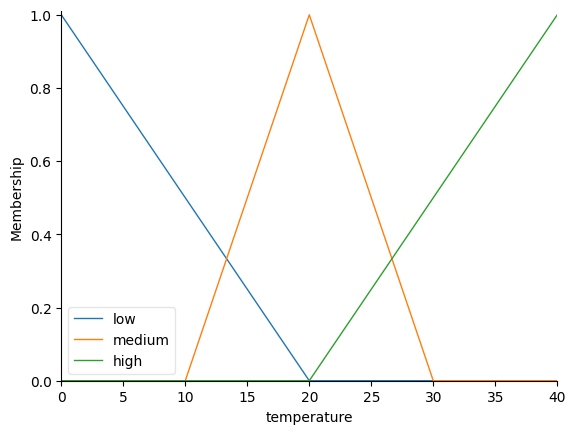

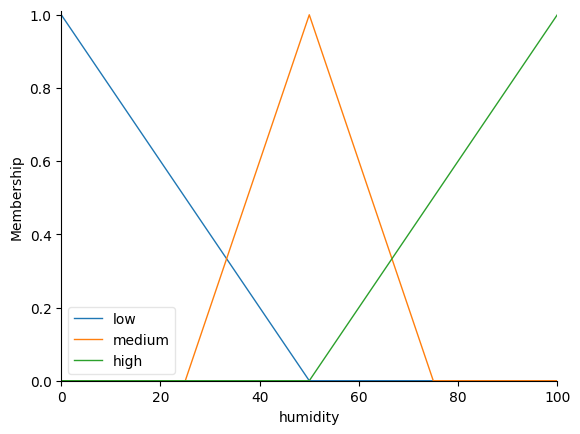

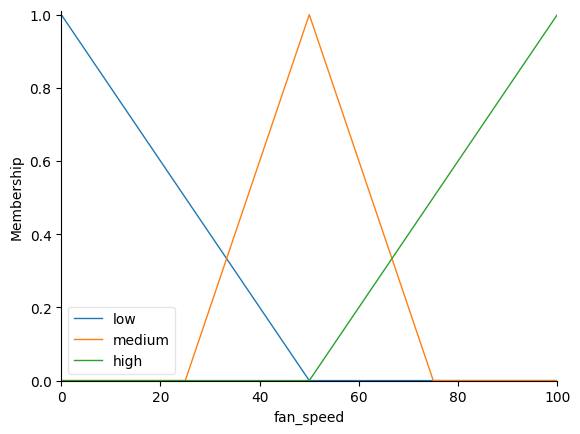

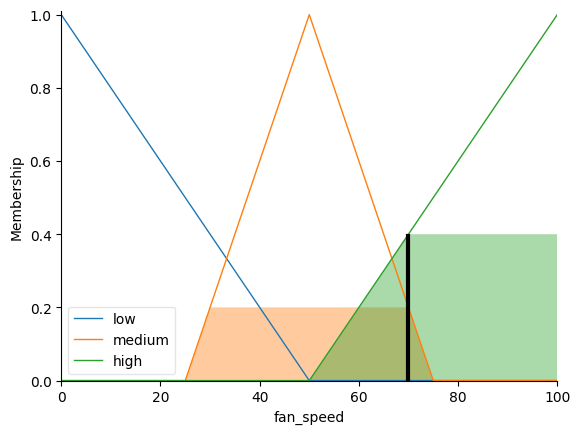

In [2]:
# Install required package (run this command in your terminal/Colab)
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Step 1: Define Fuzzy Variables
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature') # 0°C to 40°C
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity') # 0% to 100%
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed') # 0% to 100%

# Step 2: Define Membership Functions
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['medium'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['high'] = fuzz.trimf(temperature.universe, [20, 40, 40])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [25, 50, 75])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Step 3: Define Fuzzy Rules
rule1 = ctrl.Rule(temperature['low'] & humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['medium'] & humidity['low'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'] & humidity['low'], fan_speed['high'])
rule4 = ctrl.Rule(temperature['low'] & humidity['medium'], fan_speed['medium'])
rule5 = ctrl.Rule(temperature['medium'] & humidity['medium'], fan_speed['medium'])
rule6 = ctrl.Rule(temperature['high'] & humidity['medium'], fan_speed['high'])
rule7 = ctrl.Rule(temperature['low'] & humidity['high'], fan_speed['medium'])
rule8 = ctrl.Rule(temperature['medium'] & humidity['high'], fan_speed['high'])
rule9 = ctrl.Rule(temperature['high'] & humidity['high'], fan_speed['high'])

# Step 4: Create Control System (corrected from the original)
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
fan_simulation = ctrl.ControlSystemSimulation(fan_ctrl)

# Step 5: Give Inputs and Compute
fan_simulation.input['temperature'] = 28
fan_simulation.input['humidity'] = 65

fan_simulation.compute()

print("Fan Speed Output:", fan_simulation.output['fan_speed'])

# Step 6: Visualize Membership Functions and Result
temperature.view()
plt.show()

humidity.view()
plt.show()

fan_speed.view()
plt.show()

fan_speed.view(sim=fan_simulation) # Show defuzzification result
plt.show()